In [20]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import os
from os import listdir
from os.path import isfile, join
import pprint
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from cnn_feature_extractor import CNNFeatureExtractor
feat_extractor = CNNFeatureExtractor()

In [31]:

import cv2
import timeit
def match_image(img_path, img_set):
    #img = feat_extractor.load_img(img, preprocess=True)
    #img = cv2.imread(img , cv2.IMREAD_GRAYSCALE)
    matched_imgs = []

    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary

    #img = cv2.imread(img_path , cv2.IMREAD_GRAYSCALE)
    #kp1, des1 = sift.detectAndCompute(img,None)
    #print(des1)
    bf = cv2.BFMatcher(cv2.NORM_L2SQR)
    #flann = cv2.FlannBasedMatcher(index_params,search_params)
    #start = timeit.default_timer()
    kp1,des1 = feat_extractor.get_keypoints_and_descriptors(img_path)
    #stop = timeit.default_timer()
    #print("Kp and Desc : ",stop - start )


    for imgB in img_set:
        imgB_path = imgB
        
        #imgB = feat_extractor.load_img(imgB, preprocess=True)
        #imgB = cv2.imread(imgB , cv2.IMREAD_GRAYSCALE)

        kp2,des2 = feat_extractor.get_keypoints_and_descriptors(imgB_path)
        #kp2, des2 = sift.detectAndCompute(imgB,None)
        matches = bf.knnMatch(des1,des2,k=2)

        # ratio test as per Lowe's paper,
        num_good_matches = 0
        good_matches = []
        for i,(m,n) in enumerate(matches):
            if m.distance < .9 * n.distance:
                good_matches.append(m)
                num_good_matches+=1

        matched_imgs.append((imgB_path, num_good_matches))
        matched_imgs.sort(key=lambda x:x[1], reverse=True)
            
                    
    return matched_imgs

# Demo 1 : Visages


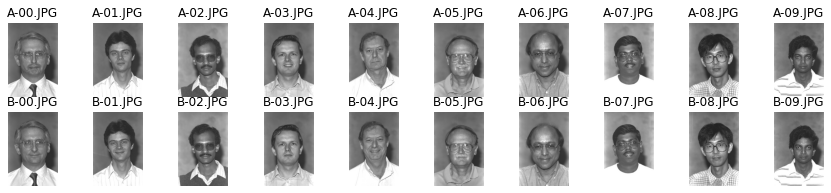

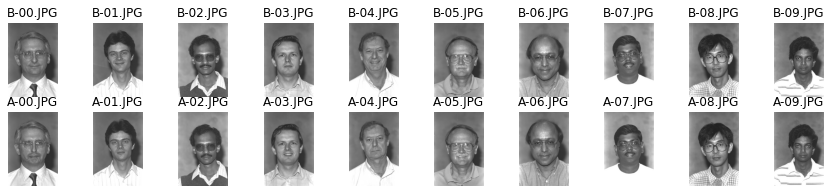

In [23]:
img_dir = './SYS809_projet2022_sequences2'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("visagesA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("visagesB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 3))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig, ax = plt.subplots(2, len(img_list_B), figsize=(15, 3))
for i, img in enumerate(img_list_B):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_B = image.imread(img)
    name_B = os.path.basename(img)
    ax[0][i].imshow(im_B)
    ax[0][i].set_title(name_B[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_A )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Demo 2 : Parc

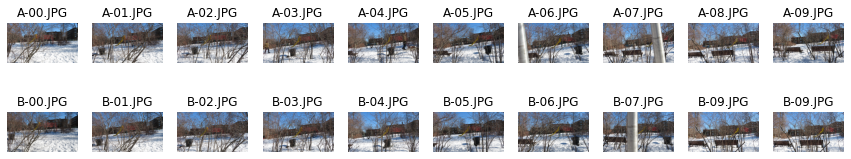

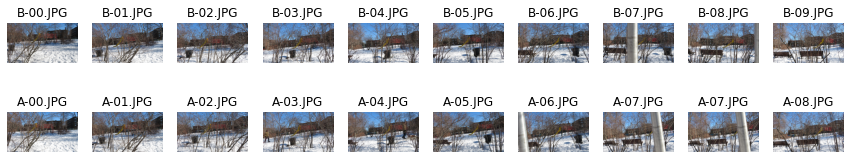

In [33]:
img_dir = './SYS809_projet2022_sequences2'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("parcA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("parcB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 3))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig, ax = plt.subplots(2, len(img_list_B), figsize=(15, 3))
for i, img in enumerate(img_list_B):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_B = image.imread(img)
    name_B = os.path.basename(img)
    ax[0][i].imshow(im_B)
    ax[0][i].set_title(name_B[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_A )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Demo 3: Brain 

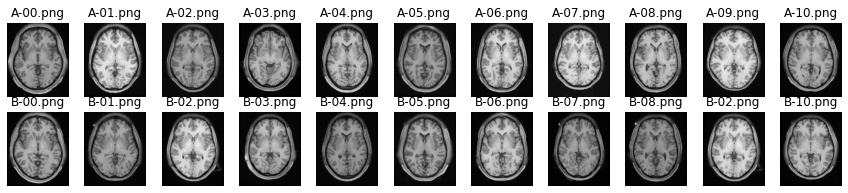

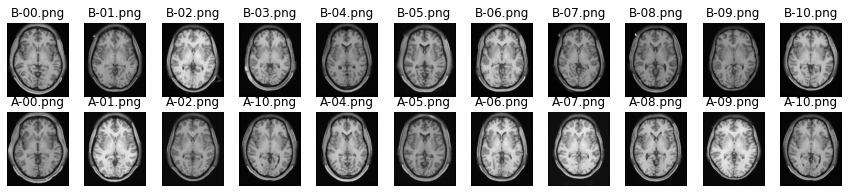

In [32]:
img_dir = './SYS809_projet2022_sequences2'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("brainA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("brainB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 3))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig, ax = plt.subplots(2, len(img_list_B), figsize=(15, 3))
for i, img in enumerate(img_list_B):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_B = image.imread(img)
    name_B = os.path.basename(img)
    ax[0][i].imshow(im_B)
    ax[0][i].set_title(name_B[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_A )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Demo 4 : Studio

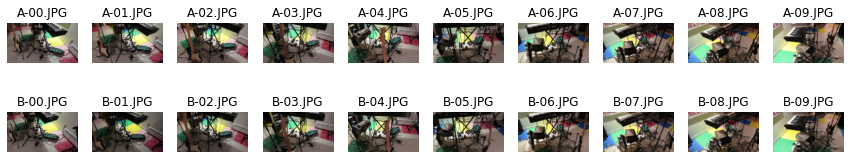

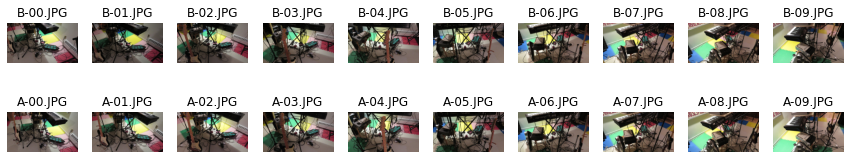

In [26]:
img_dir = './SYS809_projet2022_sequences2'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("studioA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("studioB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 3))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig, ax = plt.subplots(2, len(img_list_B), figsize=(15, 3))
for i, img in enumerate(img_list_B):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_B = image.imread(img)
    name_B = os.path.basename(img)
    ax[0][i].imshow(im_B)
    ax[0][i].set_title(name_B[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_A )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Demo 5 : Legumes

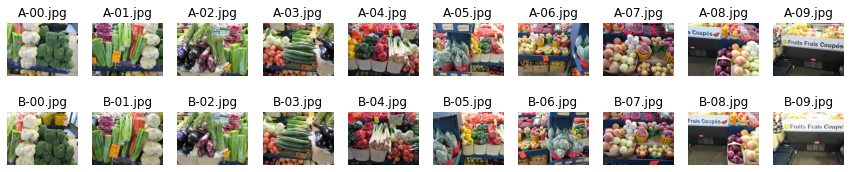

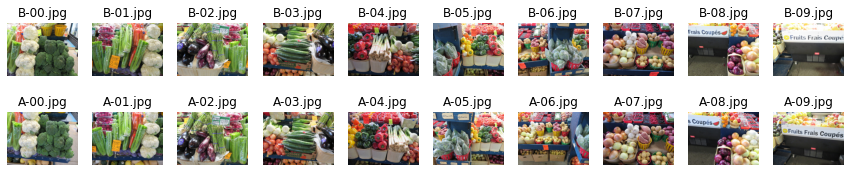

In [27]:
img_dir = './SYS809_projet2022_sequences1'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("legumesA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("legumesB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 3))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig, ax = plt.subplots(2, len(img_list_B), figsize=(15, 3))
for i, img in enumerate(img_list_B):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_B = image.imread(img)
    name_B = os.path.basename(img)
    ax[0][i].imshow(im_B)
    ax[0][i].set_title(name_B[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_A )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Demo 6 : Magasin

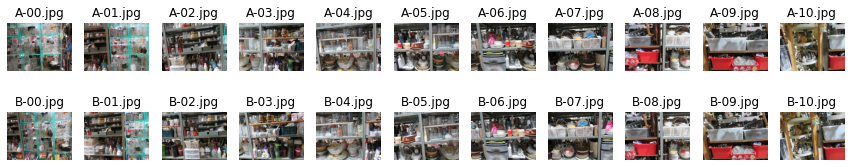

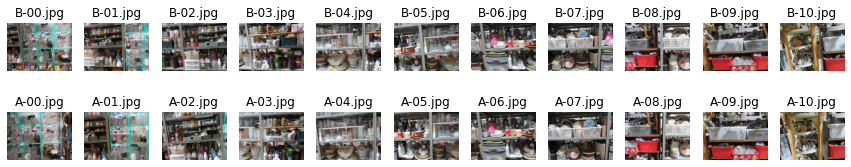

In [28]:
img_dir = './SYS809_projet2022_sequences1'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("magasinA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("magasinB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 3))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig, ax = plt.subplots(2, len(img_list_B), figsize=(15, 3))
for i, img in enumerate(img_list_B):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_B = image.imread(img)
    name_B = os.path.basename(img)
    ax[0][i].imshow(im_B)
    ax[0][i].set_title(name_B[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_A )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# Demo 7 : Neige

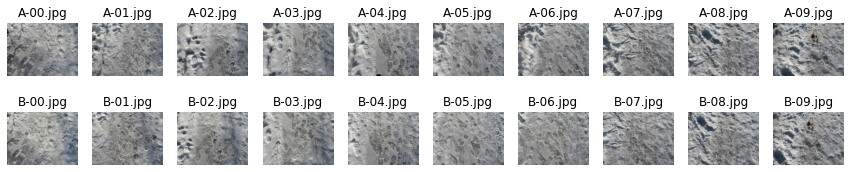

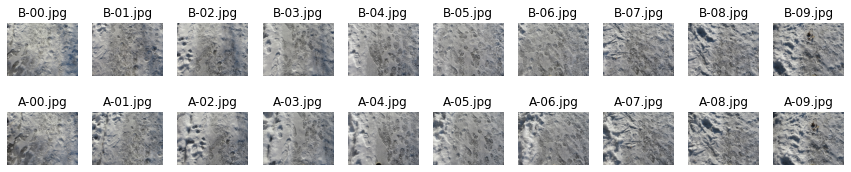

In [29]:
img_dir = './SYS809_projet2022_sequences1'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("neigeA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("neigeB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 3))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)

fig, ax = plt.subplots(2, len(img_list_B), figsize=(15, 3))
for i, img in enumerate(img_list_B):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_B = image.imread(img)
    name_B = os.path.basename(img)
    ax[0][i].imshow(im_B)
    ax[0][i].set_title(name_B[-8:])
    ax[0][i].get_yaxis().set_visible(False)
    ax[0][i].axis('off')

    im_match = match_image(img, img_list_A )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match[-8:])
    #ax[1][i].get_yaxis().set_visible(False)
    ax[1][i].axis('off')

fig.subplots_adjust(wspace=0.2, hspace=0.2)